In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
data = pd.read_csv('Encoded.csv')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 96 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1215890 non-null  int64  
 1   Seq          1215890 non-null  int64  
 2   Dur          1215890 non-null  float64
 3   RunTime      1215890 non-null  float64
 4   Mean         1215890 non-null  float64
 5   Sum          1215890 non-null  float64
 6   Min          1215890 non-null  float64
 7   Max          1215890 non-null  float64
 8   sTos         1215676 non-null  float64
 9   dTos         272823 non-null   float64
 10  sTtl         1215676 non-null  float64
 11  dTtl         272823 non-null   float64
 12  sHops        1215676 non-null  float64
 13  dHops        272823 non-null   float64
 14  TotPkts      1215890 non-null  int64  
 15  SrcPkts      1215890 non-null  int64  
 16  DstPkts      1215890 non-null  int64  
 17  TotBytes     1215890 non-null  int64  
 18  Sr

In [20]:
from sklearn.feature_selection import mutual_info_classif

In [23]:
# X = .drop(columns= 'Label')
X = data.loc[:, ~data.columns.str.contains('^Unnamed')]
X = X.dropna(axis=1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 81 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Seq          1215890 non-null  int64  
 1   Dur          1215890 non-null  float64
 2   RunTime      1215890 non-null  float64
 3   Mean         1215890 non-null  float64
 4   Sum          1215890 non-null  float64
 5   Min          1215890 non-null  float64
 6   Max          1215890 non-null  float64
 7   TotPkts      1215890 non-null  int64  
 8   SrcPkts      1215890 non-null  int64  
 9   DstPkts      1215890 non-null  int64  
 10  TotBytes     1215890 non-null  int64  
 11  SrcBytes     1215890 non-null  int64  
 12  DstBytes     1215890 non-null  int64  
 13  Offset       1215890 non-null  int64  
 14  sMeanPktSz   1215890 non-null  float64
 15  dMeanPktSz   1215890 non-null  float64
 16  Load         1215890 non-null  float64
 17  SrcLoad      1215890 non-null  float64
 18  Ds

In [25]:
Y = data.Label

In [26]:
# from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
# y2_encoded = label_encoder.fit_transform(Y2)
# # print(y_encoded)

In [27]:
X = pd.get_dummies(X)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 95 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Seq                         1215890 non-null  int64  
 1   Dur                         1215890 non-null  float64
 2   RunTime                     1215890 non-null  float64
 3   Mean                        1215890 non-null  float64
 4   Sum                         1215890 non-null  float64
 5   Min                         1215890 non-null  float64
 6   Max                         1215890 non-null  float64
 7   TotPkts                     1215890 non-null  int64  
 8   SrcPkts                     1215890 non-null  int64  
 9   DstPkts                     1215890 non-null  int64  
 10  TotBytes                    1215890 non-null  int64  
 11  SrcBytes                    1215890 non-null  int64  
 12  DstBytes                    1215890 non-null  int64  
 1

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X = StandardScaler().fit_transform(X)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['RunTime', 'Dur'])

In [34]:
finalDf = pd.concat([principalDf, X[['Label']]], axis = 1)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

KeyError: 'Label'

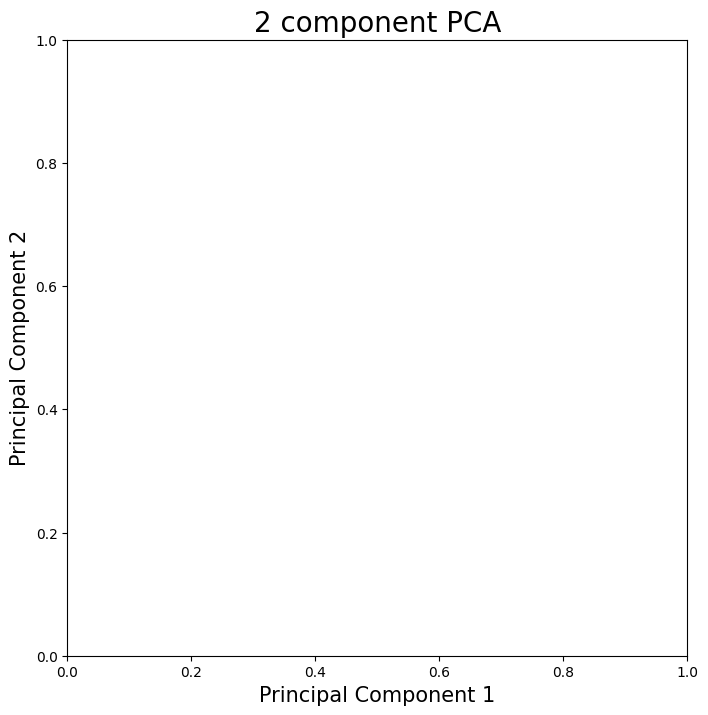

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()